
# Image Classification with Computer Vision techniques
## 1. Introduction

**Objective:** Explore and implement computer vision (CV) techniques (with logistic regression, deep learning neural networks, transfer learning etc.) to identify and process images like human vision.

**Why need Image Classification?**
Manually checking and classifying images could be a tedious task for a large data thus it is useful to automate the process using computer vision.

**Task:** Create a binary classification machine learning algorithm to distinguish zebras from elephants.
Given an image, if the model predicts "elephant" then the output should be 1 and if the model predicts "zebra" then the output should be 0.

#### About Images in CV
A color image has a total of 3 channels of a 2D array that contain values representing shades of Red, Green, Blue color.
A grayscale image has only a 1-dimensional channel of a 2D array that contains values representing shades of black and white representing the intensity value of the color.

## 2. General Approach to Image classification

1. Data Loading
2. Data preprocessing
3. Different Machine Learning techniques for the task at hand.  

### Image Classification

This project demonstrates different classification models for the task and compares the results. 
Using different libraries for the task is also demonstrated. 
The data is divided in train/valid and test split.
The notebook is in 2 parts. 
1. **Part 1** employs image pre-processing techniques in one way and thereby evaluates results on 4 classifiers- Logistic, kNN, Random Forest and SVM classifiers. 
2. **Part 2** employs deep learning approaches and uses CNN and Transfer Learning approach (with ResNet50,InceptionV3).


## 3. Results
Logistic Regression classifier is taken as baseline model.  
Best results were achieved with transfer Learning from a pre-trained model InceptionV3.

# Let's start!

### Creating the Dataset

As data size for image data is large, we ran a script to sample data into three folders for training, validation and testing purpose. The zip folder of those are uploaded on google drive and data from google drive zip folder is read into this notebook file. This saves the effort of loading images on Colab everytime runtime refreshes and we can load all images at once with few clicks.

We have 7000 images each of zebras and elephants and stored in local folder 'train_zebras' and 'train_elephant' respecively.

We need to sample data to reduce computating power required. For preparing data, we are reading filenames from train_zebras and train_elephant folder, and sampling 500 image filenames from each folder for training. Similarly sampling 400 images for validation and test set each. After each sampling step, the filename list is updated to have rest of the image filenames so as to avoid duplicates in our train, valid and test filenames lists.

**Code on below line is a one time activity to create sample data and ran on local machine **. After this process, train folder have 500 images each of zebras and elephants (total 1000), test folder have 200 images each of zebras and elephants (total 400) and Validation folder also have 200 images each of zebras and elephants (total 400)


In [ ]:

# * create train, validation and test folders with sampled images * # CODE FOR REFERENCE ONLY

import glob
import numpy as np
import pandas as pd
import os
import shutil 
import matplotlib.pyplot as plt
from PIL import Image
#from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

zebra_files = os.listdir('train_zebras') 
elephant_files = os.listdir('train_elephants') 

# * create training set * #
# sample 500 zebra image filenames for training
zebra_train = np.random.choice(zebra_files, size=500, replace=False)   

# sample 500 elephant image filenames for training
elephant_train = np.random.choice(elephant_files, size=500, replace=False) 

# update list for zebra and elephant filenames to have rest of the image filenames 
zebra_files = list( (set(zebra_files)).difference(set(zebra_train)) )      
elephant_files = list( (set(elephant_files)).difference(set(elephant_train)) )

# * create validation set * #
# sample 200 image filenames for validation set
zebra_val = np.random.choice(zebra_files, size=200, replace=False) 
elephant_val = np.random.choice(elephant_files, size=200, replace=False) 

# update list for zebra and elephant filenames to have rest of the image filenames 
zebra_files = list( (set(zebra_files)).difference(set(zebra_val)) ) 
elephant_files = list( (set(elephant_files)).difference(set(elephant_val)) ) 

# * create test set * #
# sample 200 image filenames for test set
zebra_test = np.random.choice(zebra_files, size=200, replace=False) 
elephant_test = np.random.choice(elephant_files, size=200, replace=False)

print("Zebra datasets:", zebra_train.shape, zebra_val.shape, zebra_test.shape) 
print("Elephant datasets:", elephant_train.shape, elephant_val.shape, elephant_test.shape)

def save_image_Sets(filename_lst, save_from_path, save_to_path, animal_label):
    """
    Description: Read image file from one directory and save to another directory with animal name included in file name
    
    Input:
        filename_lst :(list), input image file name list
        save_from_path :(str), directory path from where to copy an image
        save_to_path : (str), directory path to save an image
        animal_label : (str), label to include in filename
    """
    for file in filename_lst:
        im = Image.open(save_from_path + file)
        im.save(save_to_path + animal_label + file)

# save training images to "set_train" folder with animal name embeded in filename. 
# Animal name in filename is later used to create label data
save_image_Sets(zebra_train, "train_zebras/", "set_train/", "zebra_")
save_image_Sets(elephant_train, "train_elephants/", "set_train/", "elephant_")

# save validation images to "set_valid" folder with respective animal name embeded in filename. 
save_image_Sets(zebra_val, "train_zebras/","set_valid/", "zebra_")
save_image_Sets(elephant_val, "train_elephants/", "set_valid/","elephant_")

# save test images to "set_test" folder with respective animal name embeded in filename.
save_image_Sets(zebra_test, "train_zebras/", "set_test/", "zebra_")
save_image_Sets(elephant_test, "train_elephants/", "set_test/","elephant_")


#### GPU access request

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Part 1 (Statsical modeling)
### Step 1: Data loading

Data loading and preprocessing is a bit different for both Part 1 and 2 (use of different libraries demonstrated).

### Step 2. Image Pre-processing

##### Steps in image pre-processing:

1. Data scaling and label encoding: In image preprocessing, data is resized from 330 to 64. Response labels are created by processing the filename(added label zebra/elephant in filename refer kernel 1), response variable is populated with 0 if filename has zebra and 1 incase of elephant.

2. Image Augmentation: Create modified images with grayscaling generating more data from limited data and prevent overfitting. 

### Step 3. Modeling

In modeling step, four algorithms in machine learning are explored:
1. Logistic Regression (baseline)
2. kNN Classifier
3. Random Forest Classifier
4. SVM (Linear, Poly and Rbf)

These algorithms are hyperparameter tuned with gridsearch 2-fold CV. Further, best threshold for first three algorithms are also tuned to get better accuracy. The notebook demonstrates the process and compares the results on test set at the end of Part1.

## 1. Loading Image Training, Validation and Test data

Mounting google drive to access sample data in zip files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzip and read the sample data from zip folders and load on sample_data workspace in Colab notebook

In [ ]:
!unzip "/content/drive/MyDrive/862 image classification/set_train.zip" -d "/content/sample_data"
!unzip "/content/drive/MyDrive/862 image classification/set_valid.zip" -d "/content/sample_data"
!unzip "/content/drive/MyDrive/862 image classification/set_test.zip" -d "/content/sample_data"

Archive:  /content/drive/MyDrive/862 image classification/set_train.zip
replace /content/sample_data/set_train1/elephant_ASG0014ip5_0.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/MyDrive/862 image classification/set_valid.zip
replace /content/sample_data/set_valid1/elephant_ASG0014ipm_2.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/MyDrive/862 image classification/set_test.zip
replace /content/sample_data/set_test1/elephant_ASG0014iqn_0.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## 2. Visualize some sample images

In [ ]:
## Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from random import randint


from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

import cv2
import os
from os import listdir
from tqdm import tqdm
from PIL import Image

import glob

In [ ]:
# load training images and label data

IMG_DIM=(330, 330)

#train_files = glob.glob("drive/MyDrive/set_train/*")
train_files = glob.glob("sample_data/set_train1/*")
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files if img != 'sample_data/.DS_Store']
train_imgs = np.array(train_imgs)
#train_imgs = resize(train_imgs, (224, 224, 3))
train_labels = [fn.split('/')[-1].split('_')[0] for fn in train_files]

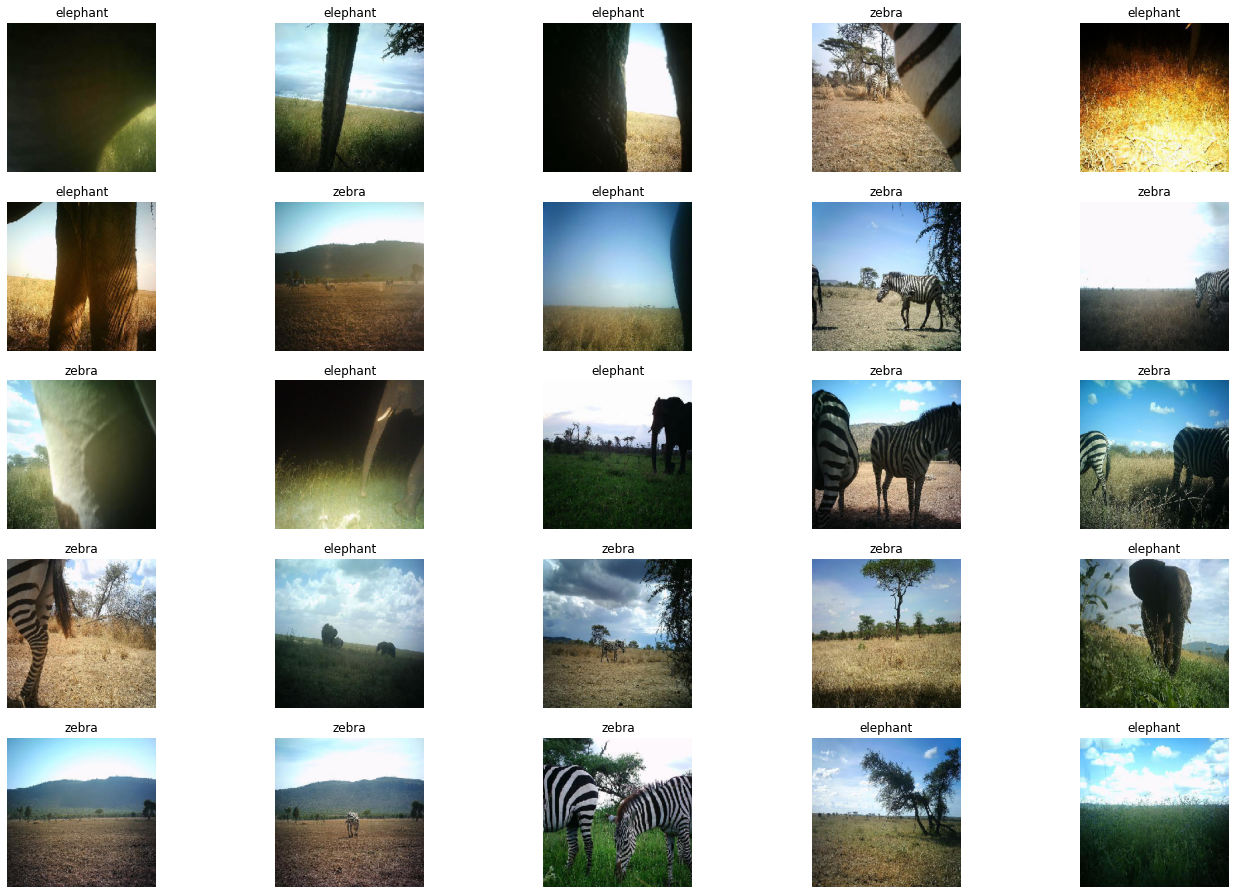

In [ ]:
# plot 25 random images to view sample data
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_imgs))
        ax[i,j].imshow(array_to_img(train_imgs[rnd_number]))
        ax[i,j].set_title(train_labels[rnd_number])
        ax[i,j].axis('off')


**Observation:** 
The images show zebra and elephant at Tanzania’s Serengeti National Park. 
As per information on data ([link])(https://www.zooniverse.org/projects/zooniverse/snapshot-serengeti/about/research) and [link](https://zindi.africa/competitions/sbtic-animal-classification/data), pictures were taken through 255 cameras that were triggered by a combination of infrared and motion sensors taking three images consecutively, after which the trigger was blocked for one minute.

Notice, in some images even though the data is labelled, it is hard to make out if the image has elephant or zebra in it.
This is because, tall sunlit grass can also trigger the camera when it blows in the wind.

## 3. Image Pre-processing and assigning labels with encoding
**Steps:**
1. Load the image and visualize (demonstrated another method)
2. Preprocess image and visualize  
2a. Convert to grayscale  
2b. Resize image as desired  
2c. Add zebra/elephant label   
2d. Encode categorical label to binary label 0/1  
3. Standardize image 


In [ ]:
# Assign path to variable
#train_ze = "Data/set_train1"
#valid_ze = "Data/set_valid1"
#test_ze = "Data/set_test1"

train_ze = "/content/sample_data/set_train1"
valid_ze = "/content/sample_data/set_valid1"
test_ze = "/content/sample_data/set_test1"

# image_size is 330 # original image size given

In [ ]:
def grayscale_resize_data(variable_path,image_size):
    '''
    Input:
    variable_path: assigned variable of image path (with label in image name) such as 'elephant_ASG001a94e_1.jpeg
    image_size: resizing dimension
    
    Output: 
    Resized grayscale Image, Encoded y label
    '''
    
    train_data= [] # empty list to store grayscaled and resized image
    labels = [] # empty list to store labels
    
    for image in tqdm(os.listdir(variable_path)): # get and iterate over the list of all files in train_zebra directory
        path = os.path.join(variable_path, image) # constructs a pathname (train_zebra/image_name)
        
        # Convert image to grayscale and resize
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)    # load an image in grayscale mode from given path
        img1 = cv2.resize(img1, (image_size,image_size)) # resize image to height and width (specified image size)
        train_data.append(img1) 
        
        # Add label (zebra/elephant) to empty list
        train_labels = image.split('_')[0] # extract 'elephant' label from filename such as 'elephant_ASG001a94e_1.jpeg
        labels.append(train_labels)  # append label to empty list  

    data = np.asarray(train_data) # Convert image to array
    
    # Encode label
    binary_label = np.array([0 if x=='zebra' else 1 for x in labels])  # encode labels zebra/elephant to binary label 0/1
    y_label = binary_label.reshape(data.shape[0],1)    # reshape the response variable as (# of images,1)
    
    return data, y_label
    

# Image Standardization to convert data between 0 and 1
def standardize_data(img_data):
    std_data = (img_data-np.min(img_data))/(np.max(img_data)-np.min(img_data))
    return std_data

In [ ]:
# load data, convert to gray scale, resize image and get y encoded label
# zebra = 1
# elephant = 0

# Let's downsize image from 330 to 64 (tried various downsizing 32,64,128,256 and 330)
img_size = 64 
train_data,y_train_labels  = grayscale_resize_data(train_ze,img_size)
valid_data,y_valid_labels = grayscale_resize_data(valid_ze,img_size)
test_data,y_test_labels = grayscale_resize_data(test_ze,img_size)

# standardize data between 0-1
X_train_std = standardize_data(train_data)
X_valid_std = standardize_data(valid_data)
X_test_std = standardize_data(test_data)

print("X_train shape: " , X_train_std.shape)
print("y_train shape: " , y_train_labels.shape)

100%|██████████| 400/400 [00:00<00:00, 1247.46it/s]

X_train shape:  (1000, 64, 64)
y_train shape:  (1000, 1)


## Let's look at few preprocessed images 

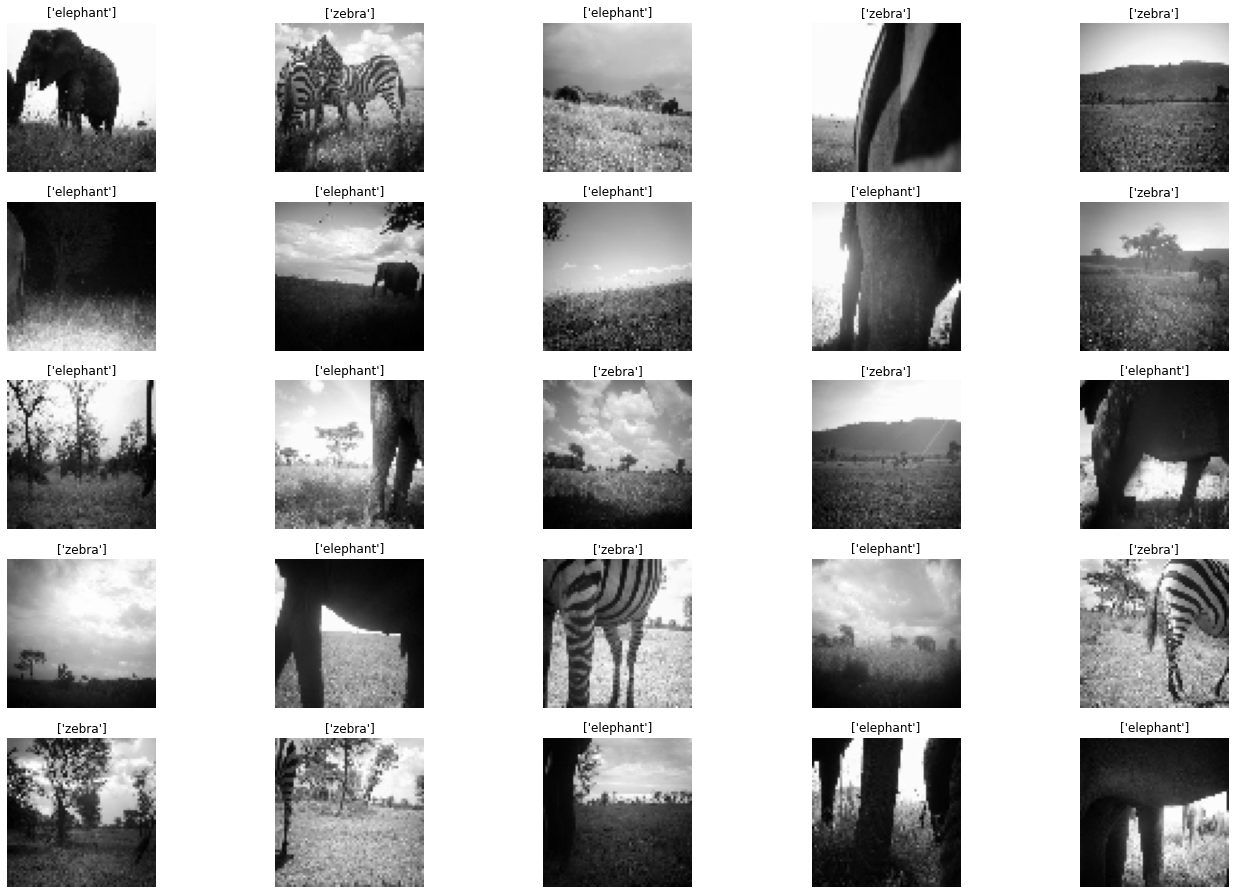

In [ ]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(X_train_std))
        ax[i,j].imshow(X_train_std[rnd_number], cmap='gray')
        ax[i,j].set_title(train_label[rnd_number])
        ax[i,j].axis('off')

## 4. Get train, valid and test data and use Classifiers - Logistic, kNN and Random Forest

First, flatten the image from (# of images, img_size, img_size) to (# of images, img_size X img_size).
For example, for our dataset, from (1000,64,64) to (1000, 4096).  
Similarly, for y labels, reshape from (1000,1) to (1000,) as array of 1 and 0 like array([1,1...,0,0]).  
Now the data is ready to perform classification task.

To perform data modeling,  
**General Approach:**
1. Train model on train set. 
2. Employ hyperparamter tuning using gridsearch CV with 2 fold 
3. Predict with best parameters on valid data
4. Perform same steps on all three classifiers
5. Predict on test set 
6. Compare accuracy across all classifiers to judge performance

In [ ]:
# Flatten images (# of images, img_size, img_size) to (# of images, img_size X img_size)

def reshape_data(X_std_data, y_labeled): 
    #for image array
    data_shape = X_std_data.shape # use standarized data
    X_data_reshaped = X_std_data.reshape(data_shape[0],data_shape[1]*data_shape[2])
    
    #for y label
    y_data_reshaped = y_labeled.reshape(data_shape[0],)
    return X_data_reshaped, y_data_reshaped

In [ ]:
# Get train, valid and test data
x_train,y_train  = reshape_data(X_train_std, y_train_labels) 
x_valid, y_valid = reshape_data(X_valid_std, y_valid_labels) 
x_test, y_test = reshape_data(X_test_std, y_test_labels) 

In [ ]:
# Import relevant algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

### 4.1 Logistic Regression

In [ ]:
# Tune and fit on train and valid set
# Hyperparameter tuning
lr_grid = {'solver': ['newton-cg', 'lbfgs', 'sag' , 'saga'], # optimizers compatible with l2 
          'max_iter': [100,500]}

LR = GridSearchCV(LogisticRegression(random_state = 862), # random state as 862 followed where ever required
                    param_grid = lr_grid, cv = 2, n_jobs = -1)

# Fit on train data
LR.fit(x_train, y_train)
best_params_lr = LR.best_params_

# Predict on valid data
lr_acc_valid = np.mean(LR.predict(x_valid) == y_valid)
print ("Accuracy with Logistic on Valid set:", lr_acc_valid)


Accuracy with Logistic on Valid set: 0.855


**Observation**: Logistic regression is doing a pretty good prediction with 0.855 accuracy on valid set by resizing the image from 330 to 64 and changing image to gray scale. We will compare how it performs on test set with other algorithms later.

### 4.2 KNN classifier

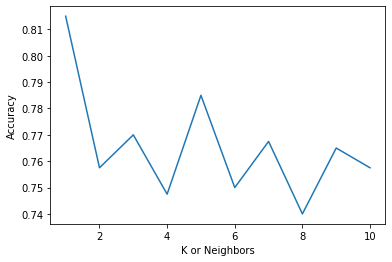

Best k is:  1
Accuracy with kNN on Valid set: 0.815


In [ ]:
#  Find best k (neighbor) for kNN 
k_range = 11    # find best from range of 10 neighbors
valid_acc = []  # blank list to store accuracy on valid set

# Loop to fit on train and predict on valid set with selected k
for k in range(1, k_range):
    KNN = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    KNN.fit(x_train, y_train)
    
    y_hat = KNN.predict(x_valid) 
    valid_acc.append(np.mean(y_hat == y_valid)) # store accuracy in list
    
# Visualize best k
%matplotlib inline
plt.plot(range(1,k_range), valid_acc)
plt.xlabel("K or Neighbors")
plt.ylabel("Accuracy")
plt.show()

# select index with highest accuracy, +1 for k value
bestK = np.argmax(valid_acc) + 1 
print("Best k is: ",bestK)
print("Accuracy with kNN on Valid set:",valid_acc[bestK-1])

**Observation:** Graph and accuracy shows the best k value is 1, with a accuracy of about 81.5% on valid set. 

### 4.3 Random Forest

In [ ]:
# Tune and fit on train and valid set
rf_grid = {'n_estimators': [50,100],
          'max_depth': [None,5],
          'max_leaf_nodes': [None,5],
          'ccp_alpha':[0,0.01,0.1],
          'min_samples_leaf' : [5]} # criterion='entropy' performed better than 'gini'

RF = GridSearchCV(RandomForestClassifier(criterion='entropy', random_state = 862), 
                    param_grid = rf_grid, cv = 2, n_jobs = -2) 
RF.fit(x_train, y_train)
rf_acc_valid = np.mean(RF.predict(x_valid) == y_valid)
print("Accuracy with Random Forest on Valid set:",rf_acc_valid)

Accuracy with Random Forest on Valid set: 0.8225


**Observation**: Entropy criterion gave a better accuracy overall than 'gini'. However, the accuracy is lower than logistic and kNN. Let's try SVM.

### 4.4 SVM

In [ ]:
# Tune and fit on train and valid set
svm_grid = {'C':[0.01,0.1,0.5,1,10]} 

LSVC = GridSearchCV(LinearSVC(random_state = 862, max_iter=1000), 
                    param_grid = svm_grid, cv = 2, n_jobs = -2) 
LSVC.fit(x_train, y_train)
lsvc_acc_valid = np.mean(LSVC.predict(x_valid) == y_valid)
print("Accuracy with Linear SVC on Valid set:",lsvc_acc_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Accuracy with Linear SVC on Valid set: 0.83


In [ ]:
# Tune and fit on train and valid set
svm_grid = {'C':[0.01,0.1,0.5,1,10],
             'degree':[1,2,3,4,5],
             'coef0':[0,1,2,3]} 

PSVC = GridSearchCV(SVC(kernel = 'poly', random_state = 862), 
                    param_grid = svm_grid, cv = 2, n_jobs = -2) 
PSVC.fit(x_train, y_train)
psvc_acc_valid = np.mean(PSVC.predict(x_valid) == y_valid)
print("Accuracy with Poly SVC on Valid set:",psvc_acc_valid)

Accuracy with Poly SVC on Valid set: 0.855


In [ ]:
# Tune and fit on train and valid set
svm_grid = {'C':[0.01,0.1,0.5,1,10],
             'gamma':[0.1,0.5,1,2,3,4]} 

RSVC = GridSearchCV(SVC(kernel = 'rbf', random_state = 862), 
                    param_grid = svm_grid, cv = 2, n_jobs = -2) 
RSVC.fit(x_train, y_train)
rsvc_acc_valid = np.mean(RSVC.predict(x_valid) == y_valid)
print("Accuracy with RBF SVC on Valid set:",rsvc_acc_valid)

Accuracy with RBF SVC on Valid set: 0.63


**Observation**: Logistic regression and Poly SVC shows good accuracy on valid set. We will consider linear and poly svc results for test set and not rbf since the accuracy is pretty low on it.
### Let's try a range of threshold values, and plot the accuracies for logistic, knn and random forest classifiers.

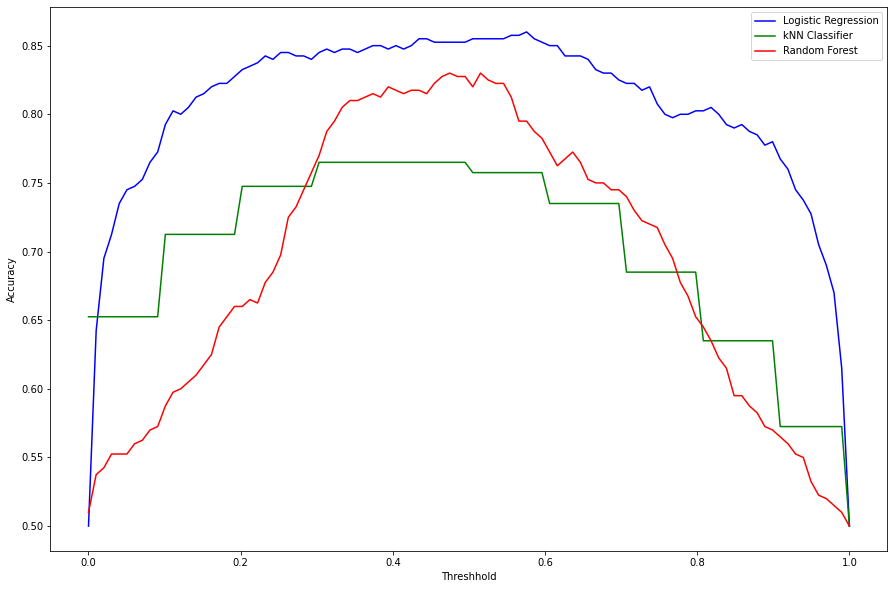

In [ ]:
from sklearn.metrics import confusion_matrix 

thresholds = np.linspace(0,1,100) # Set up a range of threshold values
acc_List_lr = []
acc_List_knn = []
acc_List_rf = []

# Looping over various threshold values
for i in thresholds:
    y_hat_th_lr = np.where(LR.predict_proba(x_valid)[:,1] > i, 1, 0)        
    confmat_lr = confusion_matrix(y_valid, y_hat_th_lr, labels = [1,0])
    acc_List_lr.append((confmat_lr[0,0] + confmat_lr[1,1]) / sum(sum(confmat_lr))) # numerator is TP + TN
    
    y_hat_th_knn = np.where(KNN.predict_proba(x_valid)[:,1] > i, 1, 0)        
    confmat_knn = confusion_matrix(y_valid, y_hat_th_knn, labels = [1,0]) 
    acc_List_knn.append((confmat_knn[0,0] + confmat_knn[1,1]) / sum(sum(confmat_knn)))
    
    y_hat_th_rf = np.where(RF.predict_proba(x_valid)[:,1] > i, 1, 0)        
    confmat_rf = confusion_matrix(y_valid, y_hat_th_rf, labels = [1,0])
    acc_List_rf.append((confmat_rf[0,0] + confmat_rf[1,1]) / sum(sum(confmat_rf)))
    

 # Let's plot the accuracies of different classifiers against the threshold values
%matplotlib inline
plt.figure(figsize=(15,10))

plt.plot(thresholds, acc_List_lr, color = 'b', label = 'Logistic Regression')
plt.plot(thresholds, acc_List_knn, color = 'g', label = 'kNN Classifier')
plt.plot(thresholds, acc_List_rf, color = 'r', label = 'Random Forest')
plt.xlabel("Threshhold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
        

**Observation**: Graph of accuracy with different threshold values shows Logistic regression is the best. We will get and use that threshold for prediction on test set. 

In [ ]:
max_Acc = print("Maximum accuracy with Logistic Regression:",max(acc_List_lr))
best_thresh = thresholds[np.argmax(acc_List_lr)]  # from index of best accuracy
best_thresh_knn = thresholds[np.argmax(acc_List_knn)]  # best threshold for KNN
best_thresh_rf = thresholds[np.argmax(acc_List_rf)]  # best threshold for RF
print("Best threshold for accuracy with Logistic:", best_thresh)

Maximum accuracy with Logistic Regression: 0.86
Best threshold for accuracy with Logistic: 0.5757575757575758


In [ ]:
# Predict on Test Set 
# Take best hyperparameters selected for all three classifiers
LR = LogisticRegression(random_state = 862, solver = best_params_lr['solver'], max_iter = best_params_lr['max_iter'])                        

KNN = neighbors.KNeighborsClassifier(n_neighbors = bestK)

RF = RandomForestClassifier(min_samples_leaf = 10, random_state = 862, 
                            n_estimators=RF.best_params_['n_estimators'], max_depth = RF.best_params_['max_depth'],
                            max_leaf_nodes = RF.best_params_['max_leaf_nodes'], ccp_alpha = RF.best_params_['ccp_alpha'])

LSVC =LinearSVC(random_state = 862, C= LSVC.best_params_['C'])

PSVC = SVC(kernel = 'poly', random_state = 862, C = PSVC.best_params_['C'], 
           degree=PSVC.best_params_['degree'], coef0 = PSVC.best_params_['coef0'])


# Fit the model
LR.fit(x_train, y_train)
KNN.fit(x_train, y_train)
RF.fit(x_train, y_train)
LSVC.fit(x_train, y_train)
PSVC.fit(x_train, y_train)

# Predict on test set
yhat1 = np.where(LR.predict_proba(x_test)[:,1] > best_thresh, 1, 0) # using best threshold
yhat2 = np.where(KNN.predict_proba(x_test)[:,1] > best_thresh_knn, 1, 0) # using best threshold
yhat3 = np.where(RF.predict_proba(x_test)[:,1] > best_thresh_rf, 1, 0) # using best threshold
yhat4 = LSVC.predict(x_test)
yhat5 = PSVC.predict(x_test)
           
# Find accuracy on test set
lr_acc_test = np.mean(yhat1 == y_test)
knn_acc_test = np.mean(yhat2 == y_test)
rf_acc_test = np.mean(yhat3 == y_test)
lsvc_acc_test = np.mean(yhat4 == y_test)           
psvc_acc_test = np.mean(yhat5 == y_test)
           
# Show results 
print ("Accuracy with Logistic on Test set:", lr_acc_test)
print ("Accuracy with kNN on Test set:", knn_acc_test)
print ("Accuracy with Random Forest on Test set:", rf_acc_test)
print ("Accuracy with Linear SVM on Test set:", lsvc_acc_test)
print ("Accuracy with Poly SVC on Test set:", psvc_acc_test)           

Accuracy with Logistic on Test set: 0.8325
Accuracy with kNN on Test set: 0.7975
Accuracy with Random Forest on Test set: 0.785
Accuracy with Linear SVM on Test set: 0.8325
Accuracy with Poly SVC on Test set: 0.8625


### Results of Part 1
**Comparing all, best accuracy is achieved with Poly SVC classifier on test set as 0.8625.**  Even though valid set results were same on Logistic Regression and Poly SVC, logistic shows some overfitting and poly SVC is performing better.   
 
Let's visualize the best results on test set given by Poly SVC before proceeding to Part 2.

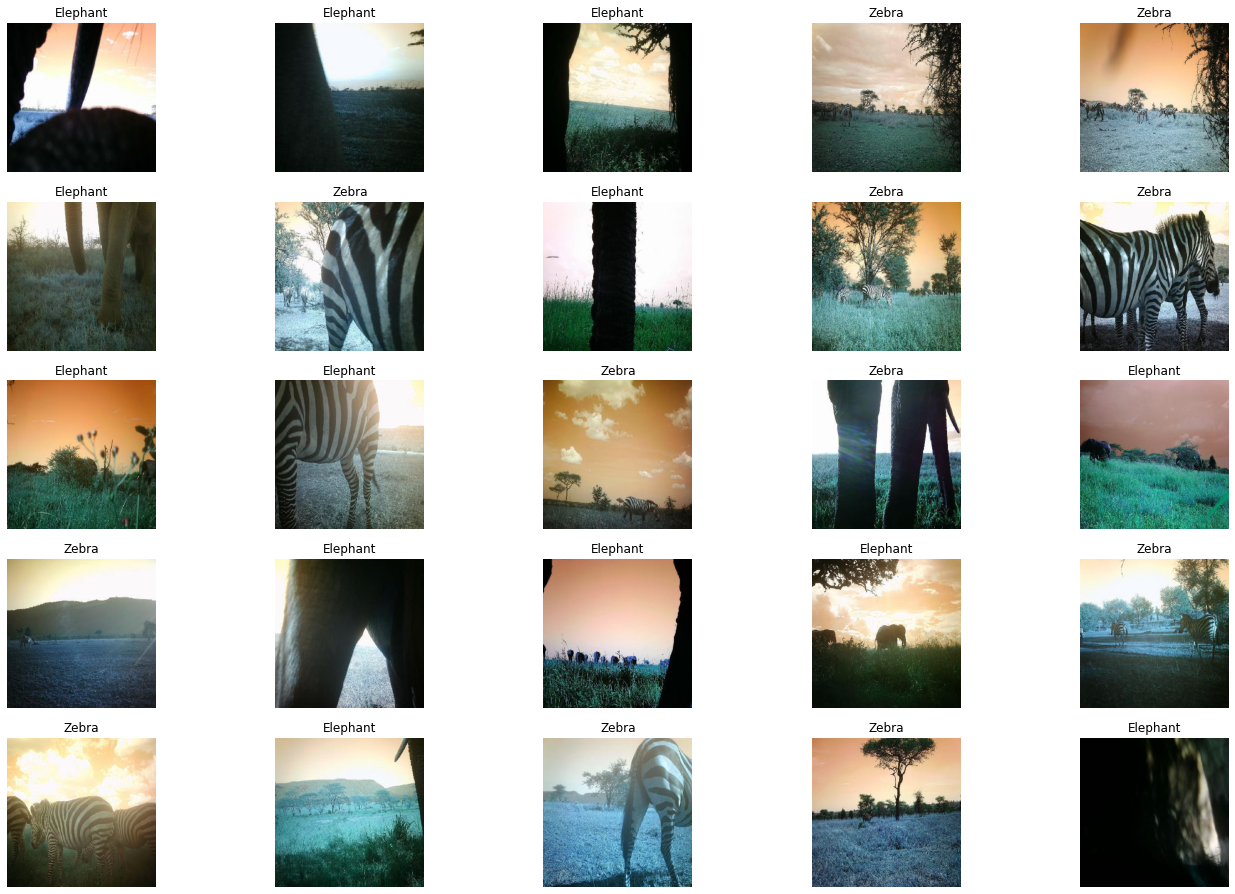

In [ ]:
PSVC_label = list(map(lambda x: 'Elephant' if x else 'Zebra', yhat5))

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(o_test))
        ax[i,j].imshow(o_test[rnd_number])
        ax[i,j].set_title(PSVC_label[rnd_number])
        ax[i,j].axis('off')

**Observation**: We can see in some images it is difficult to make out the classification or even animal presence with human eye. Let's try some deep learning techniques to see if it gives better results. 

## Part 2 (Image classification using Artificial neural network)

Convolutional neural networks (CNN) is a special architecture of artificial neural networks and it is Most popular for image classification. It has been a primary algorithm for the advancements in Computer Vision. There are various architectures of CNNs available which have been key in building state-of-art machine learning algorithms such as LeNet, AlexNet, VGGNet, GoogLeNet, ResNet, ZFNet. There are pre-trained algorithms using these architectures on ImageNet data, which are used in many computer vision related tasks for transfer learning. 

In part2 of this project we are going to look at image classification task using 3 algorithm
1. CNN algorithm and 
2. ResNet50
3. InceptionV3

### Let's start!


### Step 1: Data loading

Data loading for the first and second part of the project are executed separately even though data is being read from the same folder. This is because the data loading and preprocessing is a bit different for both the methods.

### Step 2. Image Pre-processing

##### Steps in image pre-processing:

1. Data scaling and label encoding: In image preprocessing, data is scaled by dividing each pixel by 255 to bring it to a scale of 0 to 1. Response labels are created by processing the filename. Image label is populated with zero if filename has zebra else populated with 1 for elephant.

2. Image Augmentation: Create modified images with different orientations (for eg. zoom, shear, rotation, preprocessing_function) for generating more data from limited dataset and prevent overfitting. 

### Step 3. Modeling

In modeling step, three algorithms in neural network are explored:
1. CNN algorithm
2. Transfer learning using ResNet50
3. Transfer learning using InceptionV3

Again, these three algorithm are evaluted with different combinations of input data, optimizers, learning rate and  unfreezing of last few layers in the pretrained model. The notenook encompasses only best models with each algorithm.

Model 1 - CNN with scaled data input (without Image augmentation), Optimizer = Adam, learning rate = 0.0001

Model 2 - ResNet50 with scaled data input (without Image augmentation), Optimizer = RMSprop, learning rate = 0.000001

Model 3 - Pretrained model InceptionV3 (with Image augmentation input), Optimizer = Adam, learning_rate=0.0001

Import required libraries. Other required libraries will be imported as and when required

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

import os
from os import listdir
from matplotlib import image
import glob
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn import metrics

from numpy.random import seed
seed(862)
from tensorflow.random import set_seed
set_seed(862)

### Step 1. Load training, validation and test data set.

ResNet50 is trained on image size of 224x224. Therefore, considering image size of 224x224 for our model. Hence, images are resized to 224x224 in data loading step. Image resizing is not necessary, though we explored if image resizing improves the classification results. However, we didn't find major shift in accuracy by image resizing.

In [ ]:
IMG_DIM=(224, 224)    # ResNet50 is trained on image size of 224x224. Therefore considering image size of 224x224

# load training images and label data
train_files = glob.glob("sample_data/set_train1/*")
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files if img != 'sample_data/set_train1/.DS_Store']
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[-1].split('_')[0] for fn in train_files]

# load validation images and label data
validation_files = glob.glob("sample_data/set_valid1/*")
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files if img != 'sample_data/set_valid1/.DS_Store']
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[-1].split('_')[0] for fn in validation_files]

# load test images and label data
test_files = glob.glob("sample_data/set_test1/*")
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files if img != 'sample_data/set_test1/.DS_Store']
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[-1].split('_')[0] for fn in test_files]

print('Train dataset shape:', train_imgs.shape, 
 '\nValidation dataset shape:', validation_imgs.shape,
    '\ntest dataset shape:', test_imgs.shape)

Train dataset shape: (1000, 224, 224, 3) 
Validation dataset shape: (400, 224, 224, 3) 
test dataset shape: (400, 224, 224, 3)


### Step 2. Image Pre-processing

#### Data scaling and label encoding

Deep Neural networks work well with smaller input values. Pixel values for images ranges between 0 and 255.  Therefore, scaling each image by diving pixel values by 255 to bring pixel values between 0 and 1.

In [ ]:
### Scaling image data
# Pixel values for images are between 0 and 255. Deep Neural networks work well with smaller input values. 
# Therefore, scaling each image with values between 0 and 1.

train_imgs_scaled = train_imgs.astype('float32') 
validation_imgs_scaled = validation_imgs.astype('float32')
test_imgs_scaled = test_imgs.astype('float32')
train_imgs_scaled /= 255 
validation_imgs_scaled /= 255 
test_imgs_scaled /= 255

In [ ]:
# encode text category labels
num2class_label_transformer = lambda l: ['zebra' if x==0 else 'elephant' for x in l]
class2num_label_transformer = lambda l: [0 if x=='zebra' else 1 for x in l]

train_labels_enc = class2num_label_transformer(train_labels)
validation_labels_enc = class2num_label_transformer(validation_labels)
test_labels_enc = class2num_label_transformer(test_labels)

train_labels_enc = np.array(train_labels_enc)
validation_labels_enc = np.array(validation_labels_enc)
test_labels_enc = np.array(test_labels_enc)

#### Image augmententation

Keras framework has an excellent utility called ImageDataGenerator. It generates batches of tensor image data with real-time data augmentation.

For our training datasets, we will zoom the image randomly by a factor of 0.3 using the zoom_range parameter. We rotate the image randomly by 30 degrees using the rotation_range parameter. Translating the image randomly horizontally or vertically by a 0.2 factor of the image’s width or height using the width_shift_range and the height_shift_range parameters. Applying shear-based transformations randomly using the shear_range parameter. Randomly flipping half of the images horizontally using the horizontal_flip parameter.

Also note that, we apply image augmentation transformations only to our training set images and only rescaling to validation images as  we need send original images to the model for evaluation.


In [ ]:
BATCH_SIZE = 32

# add data augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=30, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, horizontal_flip=True)

# note that the validation dataset and test set should not be augmented
val_datagen = ImageDataGenerator(rescale=1./255)

# flow training images in batches using train_generator
train_generator = train_datagen.flow(train_imgs, train_labels_enc,shuffle=False, batch_size=BATCH_SIZE, seed =1)

# flow validation images in batches using train_generator
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, shuffle=False, batch_size=BATCH_SIZE, seed =1)

batch_size = BATCH_SIZE
train_steps_per_epoch = train_imgs.shape[0] // batch_size
val_steps_per_epoch = validation_imgs.shape[0] // batch_size

### Step 3. Modeling

All neural network models are using 50 epochs to train the model.

In [ ]:
EPOCH = 50

#### Convolutional Neural Network (CNN) 

##### Model 1 - CNN with scaled data input (without Image augmentation), Optimizer = Adam, learning rate = 0.0001

In [ ]:
import tensorflow.keras.models as Models
#import tensorflow.keras.layers as Layers
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.utils as Utils

import pydot
import graphviz

In [ ]:
# Instantiate model
cnn_model = Models.Sequential()

# Add layers
cnn_model.add(layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(224, 224, 3)))
cnn_model.add(layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
cnn_model.add(layers.MaxPool2D(5,5))
cnn_model.add(layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
cnn_model.add(layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
cnn_model.add(layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
cnn_model.add(layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
cnn_model.add(layers.MaxPool2D(5,5))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(180,activation='relu'))
cnn_model.add(layers.Dense(100,activation='relu'))
cnn_model.add(layers.Dense(50,activation='relu'))
cnn_model.add(layers.Dropout(rate=0.5))
cnn_model.add(layers.Dense(1,activation='sigmoid'))

# Compile model
cnn_model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

#cnn_model.summary()
SVG(model_to_dot(cnn_model).create(prog='dot', format='svg'))
Utils.plot_model(cnn_model,to_file='model.png',show_shapes=True)

# fit model
trained = cnn_model.fit(train_imgs_scaled, train_labels_enc,epochs=EPOCH,
                        validation_data = (validation_imgs_scaled, validation_labels_enc))

Epoch 1/50
32/32 [==============================] - 30s 936ms/step - loss: 0.6836 - accuracy: 0.5810 - val_loss: 0.6472 - val_accuracy: 0.6625
Epoch 2/50
32/32 [==============================] - 28s 886ms/step - loss: 0.6128 - accuracy: 0.6470 - val_loss: 0.5897 - val_accuracy: 0.7100
Epoch 3/50
32/32 [==============================] - 28s 860ms/step - loss: 0.5838 - accuracy: 0.6750 - val_loss: 0.5354 - val_accuracy: 0.7250
Epoch 4/50
32/32 [==============================] - 28s 881ms/step - loss: 0.5436 - accuracy: 0.7220 - val_loss: 0.5386 - val_accuracy: 0.7400
Epoch 5/50
32/32 [==============================] - 28s 885ms/step - loss: 0.5318 - accuracy: 0.7360 - val_loss: 0.5287 - val_accuracy: 0.7275
Epoch 6/50
32/32 [==============================] - 28s 871ms/step - loss: 0.5447 - accuracy: 0.7140 - val_loss: 0.5039 - val_accuracy: 0.7450
Epoch 7/50
32/32 [==============================] - 28s 878ms/step - loss: 0.5107 - accuracy: 0.7470 - val_loss: 0.4978 - val_accuracy: 0.7775

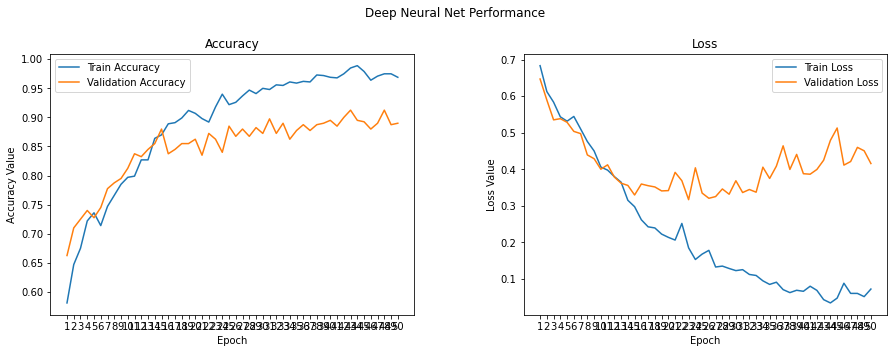

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,EPOCH+1))
ax1.plot(epochs, trained.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, trained.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, trained.history['loss'], label='Train Loss')
ax2.plot(epochs, trained.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Calculate accuracy on validation and test set

In [ ]:
# Calculate accuracy on validation and test set
print('Accuracy with CNN model (without image augmentation):')

val_pred_labels = cnn_model.predict_classes(validation_imgs_scaled, verbose=0)
print('Validation Accuracy:', metrics.accuracy_score(validation_labels_enc, val_pred_labels))

test_pred_labels = cnn_model.predict_classes(test_imgs_scaled, verbose=0)
print('Test Accuracy:', metrics.accuracy_score(test_labels_enc, test_pred_labels))

Accuracy with CNN model (without image augmentation):
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Validation Accuracy: 0.89
Test Accuracy: 0.8875


**Observation** We achieve pretty good accuracy of 89% on validation set and 88% accuracy on test set with simple CNN model. This also shows that our model is not overfitting. However, graph for loss shows that loss increases with epochs more than 20.

#### Pretrained model with ResNet50

Model 2: ResNet50 without Image augmentation, with 2 fully connected layes, Optimizer = RMSprop, learning rate = 0.000001

We use ResNet50 deep learning model as the pre-trained model for feature extraction for Transfer Learning.

To implement Transfer learning, we will remove the last predicting layer of the pre-trained ResNet50 model by using “include_top=False”and replace them with our own predicting layers.

We freeze the weights of the model by setting trainable as “False”. This stops any updates to the pre-trained weights during training. We do not want to train ResNet layers as we want to leverage the knowledge learned by the deep neural network trained from the previous data set which in our case is “imagenet”

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras 
import tensorflow.keras.layers as Layers

#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.utils import to_categorical

In [ ]:
# Instantiate base model
restnet = ResNet50(include_top=False,   # To not to load the last fully connected layers which act as the classifier
                   weights='imagenet',  # leverage the knowledge learned by the deep NN trained from data set imagenet
                   input_shape=(224, 224,3))

output = layers.Flatten()(restnet.layers[-1].output) # Flatten the last layer of resnet

restnet = Model(restnet.input, outputs=output)
for layer in restnet.layers:
    layer.trainable = False  

In [ ]:
model2 = Sequential()
model2.add(restnet)

# Add fully connected dense layers for classification
model2.add(Dense(512, activation='relu', input_dim=(224, 224,3)))
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

# plot model
SVG(model_to_dot(model2).create(prog='dot', format='svg'))
Utils.plot_model(model2,to_file='model.png',show_shapes=True)

history = model2.fit(train_imgs_scaled, train_labels_enc, epochs=EPOCH, 
                              validation_data = (validation_imgs_scaled, validation_labels_enc), 
                              validation_steps=25, 
                              verbose=1)

# Calculate Validation accuracy
val_pred_labels = model2.predict_classes(validation_imgs_scaled, verbose=0)
print('Validation Accuracy:', metrics.accuracy_score(validation_labels_enc, val_pred_labels))

# Calculate test accuracy
test_pred_labels = model2.predict_classes(test_imgs_scaled, verbose=0)
print('Test Accuracy:', metrics.accuracy_score(test_labels_enc, test_pred_labels))

Epoch 1/50
32/32 [==============================] - 6s 190ms/step - loss: 0.7613 - accuracy: 0.5470 - val_loss: 0.6595 - val_accuracy: 0.6575
Epoch 2/50
32/32 [==============================] - 5s 153ms/step - loss: 0.7031 - accuracy: 0.5800 - val_loss: 0.7630 - val_accuracy: 0.5250
Epoch 3/50
32/32 [==============================] - 5s 154ms/step - loss: 0.6829 - accuracy: 0.5820 - val_loss: 0.6327 - val_accuracy: 0.6975
Epoch 4/50
32/32 [==============================] - 5s 155ms/step - loss: 0.6682 - accuracy: 0.6090 - val_loss: 0.7724 - val_accuracy: 0.5225
Epoch 5/50
32/32 [==============================] - 5s 155ms/step - loss: 0.6494 - accuracy: 0.6160 - val_loss: 0.8255 - val_accuracy: 0.5050
Epoch 6/50
32/32 [==============================] - 5s 156ms/step - loss: 0.6376 - accuracy: 0.6360 - val_loss: 0.8505 - val_accuracy: 0.5025
Epoch 7/50
32/32 [==============================] - 5s 155ms/step - loss: 0.6385 - accuracy: 0.6630 - val_loss: 0.5722 - val_accuracy: 0.7225
Epoch 

**Observation** We achieve 75% accuracy on both validation set and test set with transfer learning using ResNet50 pre-trained model. The accuracy achieved with ResNet50 pre-trained model is less than simple CNN model. It might be because the feature extractions learned from ResNet50 are not really transferable for this specific task.

#### Model 3: Pretrained model InceptionV3 (with Image augmentation input), Optimizer = Adam, learning_rate=0.0001

Inception-v3 is a pre-trained convolutional neural network model that is 48 layers deep. It is the third edition of Inception CNN model by Google, originally instigated during the ImageNet Recognition Challenge. To implement Transfer learning, we will remove the last predicting layer of the pre-trained InceptionV3 model and replace them with our own predicting layers. Weights of the pre-trained model are frozen and are not updated during the training. 

For this model, we are passing image augmented data for training as the model achieved best results with image augmented data than simply rescaled data input.

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D

In [ ]:
# ## Prepare Deep Learning Classifier
# 
# Load InceptionV3 pretrained on ImageNet without its top/classification layer
# Add additional custom layers on top of InceptionV3 to prepare custom classifier

# Get the InceptionV3 model so we can do transfer learning
base_inception = InceptionV3(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
#total_classes = test_labels_enc.shape[1]
predictions = Dense(1, activation='sigmoid')(out)

# * Stack the two models (InceptionV3 and custom layers) on top of each other 
# * Compile the model and view its summary

model3 = Model(inputs=base_inception.input, outputs=predictions)

# to freeze pre-trained layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
model3.compile(optimizer=Optimizer.Adam(lr=.0001), loss='binary_crossentropy', metrics=['accuracy']) 

history = model3.fit(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=EPOCH,
                              verbose=1)

Epoch 1/50
31/31 [==============================] - 12s 390ms/step - loss: 0.4169 - accuracy: 0.7903 - val_loss: 0.2433 - val_accuracy: 0.9036
Epoch 2/50
31/31 [==============================] - 11s 349ms/step - loss: 0.2693 - accuracy: 0.8874 - val_loss: 0.2178 - val_accuracy: 0.8958
Epoch 3/50
31/31 [==============================] - 11s 347ms/step - loss: 0.2423 - accuracy: 0.8967 - val_loss: 0.2100 - val_accuracy: 0.9115
Epoch 4/50
31/31 [==============================] - 11s 349ms/step - loss: 0.2370 - accuracy: 0.8874 - val_loss: 0.2167 - val_accuracy: 0.9062
Epoch 5/50
31/31 [==============================] - 11s 347ms/step - loss: 0.2297 - accuracy: 0.8967 - val_loss: 0.1903 - val_accuracy: 0.9115
Epoch 6/50
31/31 [==============================] - 11s 347ms/step - loss: 0.2473 - accuracy: 0.8833 - val_loss: 0.1985 - val_accuracy: 0.9010
Epoch 7/50
31/31 [==============================] - 11s 348ms/step - loss: 0.2364 - accuracy: 0.8833 - val_loss: 0.1843 - val_accuracy: 0.9167

In [ ]:
predicts_transform = lambda l: [1 if x >0.5 else 0 for x in l]

# Calculate Validation accuracy
val_predictions = model3.predict(validation_imgs_scaled)
val_predicts_label = predicts_transform(val_predictions)
print('Validation Accuracy:', metrics.accuracy_score(validation_labels_enc, val_predicts_label))

# Calculate test accuracy
test_predictions = model3.predict(test_imgs_scaled)
test_predicts_label = predicts_transform(test_predictions)
print('Test Accuracy:', metrics.accuracy_score(test_labels_enc, test_predicts_label))

Validation Accuracy: 0.93
Test Accuracy: 0.94


**Observation** : We achieve 93% accuracy on validation set and 94% accuracy on test set with transfer learning using InceptionV3 pre-trained model (best in deep learning). Although most of the models, achieve more than 80% accuracy, the one achieved with transfer learning, especially with InceptionV3 is best overall. Therefore, transfer learning is an effective method for image classification. In general, to study the herbivores habitat, the results show satisfactory performance.



Future scope to improve performance
1. Further Hyperparameter tuning for neural networks
2. Ensemble modeling (voting or stacking) with week learners in task 1
3. Evaluation using other metrics such as F1 score, precision or recall could be explored by identifying the class with more misclassification error.

References:

https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/

https://towardsdatascience.com/how-to-build-an-image-classification-app-using-logistic-regression-with-a-neural-network-mindset-1e901c938355

https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
        
https://towardsdatascience.com/deep-learning-using-transfer-learning-python-code-for-resnet50-8acdfb3a2d38

https://www.fast.ai/2020/01/13/self_supervised/

https://github.com/dipanjanS/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch06%20-%20Image%20Recognition%20and%20Classification/dog_breed_transfer_learning_classifier.py